# 5주차 과제

### 슬라이드 실행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = 0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

class sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)  

weights : array-like of shape (n_classifiers,), default=None  
클래스가 발생할 확률에 따라 가중치를 부여하는 파라미터  

n_jobs : int, default=None  
fit을 할 때 병렬로 작업할 작업의 수  

flatten_transform : bool, default=True
voting =’soft’인 경우에만 변환 출력의 모양에 영향을줍니다.

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

슬라이드에는 voting='hard'일 때 결과가 0.928인데 실행 결과가 0.904로 나와서  
voting_clf.get_params(deep=True)를 통해 확인해보니 설정이 올바르게 되어있음(위는 hard, 아래는 soft)을 확인했습니다.

In [4]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
#voting_clf.get_params(deep=True)

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [5]:
voting_clf_soft = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)], voting='soft')

for clf in (log_clf, rnd_clf, dt_clf, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

#voting_clf_soft.get_params(deep=True)

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


수업 내용처럼 oob 평가와 예측 정확도는 다르지만 비슷한 기능을 함을 확인할 수 있었습니다.

In [6]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500, bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)

#obb-score 출력
print("oob_score: ", bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

oob_score:  0.8986666666666666


0.912

In [7]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth =3, random_state=42,
                               eval_metric="logloss")
xgb_clf.fit(X_train, y_train)
y_pred= xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.872

C:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


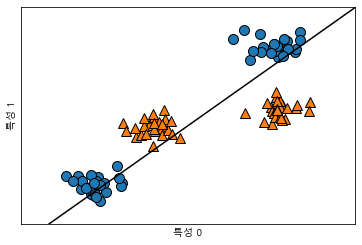

In [8]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


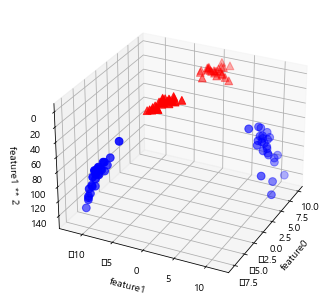

In [9]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

plt.show()

C:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


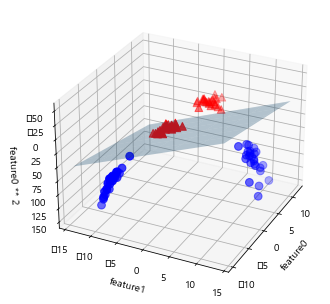

In [10]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
mask = y == 0
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")
plt.show()

Text(0, 0.5, '특성 1')

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


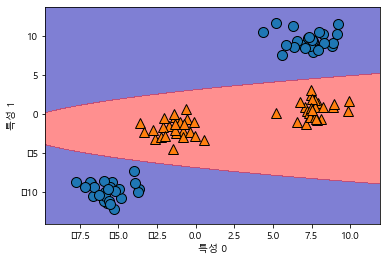

In [11]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’scale’, 
coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
class_weight=None, verbose=False, max_iter=-1, 
decision_function_shape=’ovr’, random_state=None)  

C : float, default=1.0  
정규화의 강도는 C에 반비례합니다. 양수만 가능합니다.  

kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ 
커널 유형을 지정합니다.  

gamma : {‘scale’, ‘auto’} or float, default=’scale’ 
if 'scale',1 / (n_features * X.var()) 
if 'auto', uses 1 / n_features.  

슬라이드와 다른 값이 나왔습니다.

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


In [13]:
# 훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)

# 훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 
X_train_scaled = (X_train - min_on_training) / range_on_training

# 테스트 세트에도 같은 작업을 적용
# 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

전처리 이전에도 0.94라는 높은 정확도를 보였지만, 전처리 이후 그 정확도가 더 높아짐을 확인했습니다.

In [14]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [15]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


Text(0, 0.5, '특성 1')

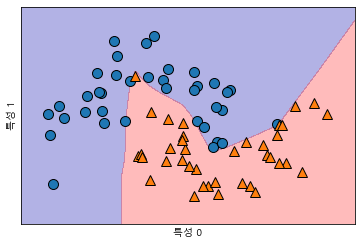

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

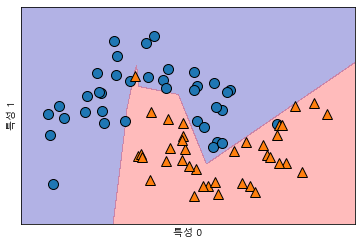

In [17]:
# hidden_layer_sizes=[10], 은닉유닛수 10개
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

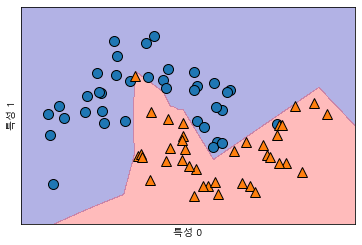

In [18]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

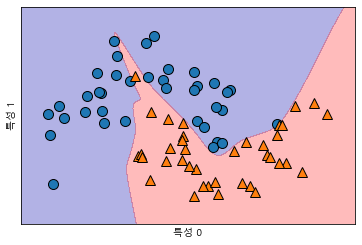

In [19]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


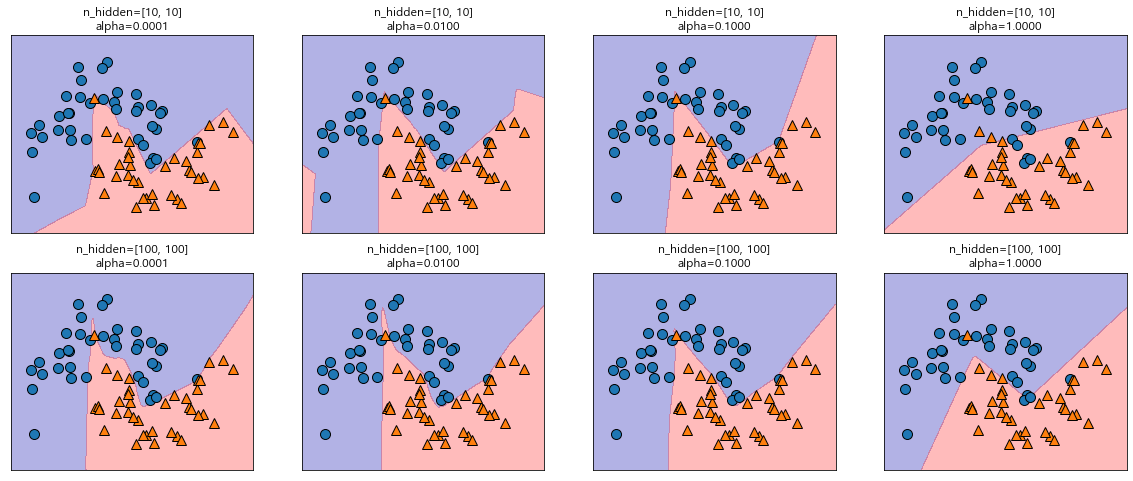

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

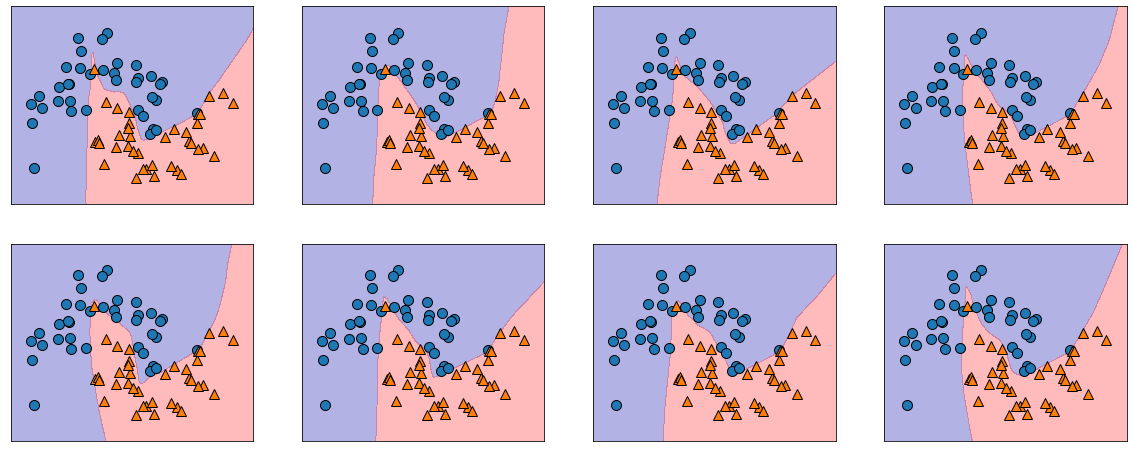

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

이 부분도 슬라이드의 결과와 다르게 측정되었습니다,

In [22]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test,y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [23]:
# 훈련 세트 각 특성의 평균을 계산합니다.
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1인 데이터로 편환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 같은 변환을 테스트 세트에도 합니다.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


위에서와 마찬가지로 전처리 이후 정확도가 더 높아짐을 확인하였습니다.

In [24]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [25]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, y_train_named)

# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)[:6]))

# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

결정 함수:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]
Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                   random_state=0)

gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, y_train)

print("결정 함수의 결과 형태:\n{}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("예측:\n{}".format(gbrt.predict(X_test)))

결정 함수의 결과 형태:
(38, 3)
결정 함수 결과:
[[-8.0104411  -6.98527486  4.81705717]
 [-8.01819888  3.77312674 -6.87620465]
 [ 6.24999284 -4.29928465 -6.91535308]
 [-8.01043891 -6.98023452  4.73731973]
 [ 6.24943072 -5.1093528  -6.91535386]
 [-8.01043891 -6.98002911  4.73713144]]
예측 확률:
[[2.68586307e-06 7.48700134e-06 9.99989827e-01]
 [7.56970160e-06 9.99968714e-01 2.37159514e-05]
 [9.99971873e-01 2.62116756e-05 1.91580234e-06]
 [2.90880070e-06 8.14940771e-06 9.99988942e-01]
 [9.99986417e-01 1.16664063e-05 1.91690594e-06]
 [2.90934842e-06 8.15261667e-06 9.99988938e-01]]
예측:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


### 조정 및 테스트

VotingClassifier에 들어가는 estimators의 구성을 바꿔보았는데 기존의 구성이 새로 한 구성보다 정확도가 높게 나왔습니다. 아마도 Knn이나 Naive Bayes는 아주 정확한 예측 보다는 빠르고 이해하기 좋은 종류의 분류기이기 때문이라고 생각합니다.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X, y = make_moons(n_samples = 500, noise = 0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# 첫 번째는 위에서 했던 로지스틱 회귀, 랜덤 포레스트, 결정 트리로 구성
voting_clf1 = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)], voting='hard')
voting_clf1.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(n_neighbors=5)
gnb_clf = GaussianNB()

# 두 번째는 knn, NaiveBase, 로지스틱 회귀로 구성
voting_clf2 = VotingClassifier(
estimators=[('knn', knn_clf), ('NB', gnb_clf), ('lr', log_clf)], voting='hard')
voting_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('NB', GaussianNB()),
                             ('lr', LogisticRegression(random_state=42))])

In [31]:
y_pred1 = voting_clf1.predict(X_test)
y_pred2 = voting_clf2.predict(X_test)

print("첫 번째 결과 : ", accuracy_score(y_test, y_pred1))
print("두 번째 결과 : ", accuracy_score(y_test, y_pred2))

첫 번째 결과 :  0.904
두 번째 결과 :  0.864


위의 데이터에 랜덤 포레스트 분류기를 적용했을 때, oob평가가 에측 정확도보다 높게 나온 것을 확인했습니다.

In [32]:
rnd_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

print("oob_score : ", rnd_clf.oob_score_)
print("정확도 : ", accuracy_score(y_test, y_pred) )

oob_score :  0.9093333333333333
정확도 :  0.896


iris dataset에 대해서 두 모델의 정확도를 측정한 결과  
훈련 세트에서는 LinearSVC가 SVC보다 높은 정확도를,  
테스트 세트에서는 SVC가 LinearSVC보다 높은 정확도를 보였습니다.  
추가적으로 슬라이드에서 SVC와 LinearSVC를 비슷하게 조정하는 법의 있어서 진행해보았는데 높은 정확도를 보이지만 실제로 LinearSVC와는 다르게 작동함을 확인하였습니다.

In [38]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                   random_state=0)

lsvc = LinearSVC().fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)
svc2 = SVC(kernel="linear", C=float("inf")).fit(X_train, y_train)

print("LinearSVC 훈련 세트 정확도 : {:.2f}".format(lsvc.score(X_train, y_train)))
print("LinearSVC 테스트 세트 정확도 : {:.2f}".format(lsvc.score(X_test, y_test)))

print("SVC 훈련 세트 정확도 : {:.2f}".format(svc.score(X_train, y_train)))
print("SVC 테스트 세트 정확도 : {:.2f}".format(svc.score(X_test, y_test)))

print("SVC2 훈련 세트 정확도 : {:.2f}".format(svc2.score(X_train, y_train)))
print("SVC2 테스트 세트 정확도 : {:.2f}".format(svc2.score(X_test, y_test)))

LinearSVC 훈련 세트 정확도 : 0.98
LinearSVC 테스트 세트 정확도 : 0.92
SVC 훈련 세트 정확도 : 0.96
SVC 테스트 세트 정확도 : 0.97
SVC2 훈련 세트 정확도 : 1.00
SVC2 테스트 세트 정확도 : 0.97


C:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


boston 데이터에 대해서 LinearSVR과 SVR을 통해 회귀를 해보았는데, 결과처럼 처참한 정확도를 볼 수 있었습니다. 혹시 몰라서 전처리를 진행한 후 다시 시도했는데, 정확도가 많이 올라가기는 하였지만 신뢰할 수 있는 수준의 정확도는 아니었습니다.

In [34]:
from sklearn.svm import SVR, LinearSVR
from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

lsvr = LinearSVR().fit(X_train, y_train)
svr = SVR().fit(X_train, y_train)

print("LinearSVR 훈련 세트 정확도 : {:.2f}".format(lsvr.score(X_train, y_train)))
print("LinearSVR 테스트 세트 정확도 : {:.2f}".format(lsvr.score(X_test, y_test)))

print("SVR 훈련 세트 정확도 : {:.2f}".format(svr.score(X_train, y_train)))
print("SVR 테스트 세트 정확도 : {:.2f}".format(svr.score(X_test, y_test)))

LinearSVR 훈련 세트 정확도 : 0.24
LinearSVR 테스트 세트 정확도 : 0.22
SVR 훈련 세트 정확도 : 0.24
SVR 테스트 세트 정확도 : 0.08


C:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [35]:
# 훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)

# 훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 
X_train_scaled = (X_train - min_on_training) / range_on_training

# 테스트 세트에도 같은 작업을 적용
# 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [36]:
lsvr = LinearSVR().fit(X_train_scaled, y_train)
svr = SVR().fit(X_train_scaled, y_train)

print("LinearSVR 훈련 세트 정확도 : {:.2f}".format(lsvr.score(X_train_scaled, y_train)))
print("LinearSVR 테스트 세트 정확도 : {:.2f}".format(lsvr.score(X_test_scaled, y_test)))

print("SVR 훈련 세트 정확도 : {:.2f}".format(svr.score(X_train_scaled, y_train)))
print("SVR 테스트 세트 정확도 : {:.2f}".format(svr.score(X_test_scaled, y_test)))

LinearSVR 훈련 세트 정확도 : 0.67
LinearSVR 테스트 세트 정확도 : 0.51
SVR 훈련 세트 정확도 : 0.68
SVR 테스트 세트 정확도 : 0.47


아래는 GradientBoostingClassifier는 매우 정확한 모델이고, Naive Bayes는 일단 데이터에 대해서 잘 모를 때, 시험해보기도 좋고 생각보다 정확한 결과를 내주는 알고리즘으로 알고 있기에 두 모델의 결과가 어떻게 다른지 decision_function과 predict_proba로 확인해보려고 하였습니다. 결과는 GaussianNB에는 decision_function이 없어서 아쉽게도 확인할 수 없었습니다.

In [40]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("gbrt 훈련 세트 정확도: {:.2f}".format(gbrt.score(X_train,y_train)))
print("gbrt 테스트 세트 정확도: {:.2f}".format(gbrt.score(X_test,y_test)))

print("gnb 훈련 세트 정확도: {:.2f}".format(gnb.score(X_train,y_train)))
print("gnb 테스트 세트 정확도: {:.2f}".format(gnb.score(X_test,y_test)))

gbrt 훈련 세트 정확도: 1.00
gbrt 테스트 세트 정확도: 0.97
gnb 훈련 세트 정확도: 0.95
gnb 테스트 세트 정확도: 0.94


In [43]:
print("gbrt 결정 함수의 결과 형태:\n{}".format(gbrt.decision_function(X_test).shape))
print("gbrt 결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6]))
print("gbrt 예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("gbrt 예측:\n{}".format(gbrt.predict(X_test)))

print("gnb 결정 함수의 결과 형태:\n{}".format(gnb.decision_function(X_test).shape))
print("gnb 결정 함수 결과:\n{}".format(gnb.decision_function(X_test)[:6]))
print("gnb 예측 확률:\n{}".format(gnb.predict_proba(X_test)[:6]))
print("gnb 예측:\n{}".format(gnb.predict(X_test)))

gbrt 결정 함수의 결과 형태:
(143,)
gbrt 결정 함수 결과:
[-6.71498791  5.73184677  7.3579928   4.96244648  7.7051529   8.00066721]
gbrt 예측 확률:
[[9.98788868e-01 1.21113206e-03]
 [3.23061546e-03 9.96769385e-01]
 [6.37070603e-04 9.99362929e-01]
 [6.94719074e-03 9.93052809e-01]
 [4.50296952e-04 9.99549703e-01]
 [3.35126530e-04 9.99664873e-01]]
gbrt 예측:
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


AttributeError: 'GaussianNB' object has no attribute 'decision_function'